# The Hough Stream Spotter (HSS)
## by Sarah Pearson
Pearson et al. 2021

A walkthrough of how to run the HSS

The HSS relies on the Hough Transform (Hough 1962) to identify linear structures in discrete data sets. The Hough Transform maps from position space ($x,y$) to ($\rho,\theta$) space through the following parametirization of a straight line:

$\rho = x {\rm cos}(\theta) + y {\rm sin}(\theta)$


$\rho$ resents the minimum Euclidean distance from the origin in positional ($x,y$)-space, and $\theta$ represents the orientation of each possible line in $[0,\pi]$
If a subset of points in ($x,y$) spacelie on a straight line, their sinusoidal curves will overlapat  the  same  minimal  Euclidean  distance  from  the  ori-gin,ρ, and at the same orientation angle, $\theta$.  Therefore,a straight line in ($x,y$) will correspond to a point in (ρ,θ) space where multiple sinusoidal curves overlap. 

We discretize the set of possible line orientations into an array $\theta_{arr}$ that  spans  0  to  180 deg  spaced  by  $\Delta \theta = 0.1\deg$. Each star thus maps to a sinusoid defined by the Hough Transform above applied to the star position ($x,y$) and  $\theta=\theta_{arr}$.  The sinusoids of the stars belonging to the stream overlap one another in the same region of(ρ,θ) space. 

Se more details in Section 3 of Pearson et al. 2021


## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import HSS 


## Change the following paths to your liking:

In [2]:
# location to save plots: change to your liking
path_plot = '/Users/spearson/Desktop/'

## Input for the HSS

See also READMe.md and Section 3.3. in Pearson et al. 2021



In [3]:
#import test data
filename = 'fakestream.txt' #your data file name, in kpc in this example
# load in stream
fakestream = np.genfromtxt(filename) # (n,2) array n is number of stars in region 
pos = fakestream[:,0], fakestream[:,1] # in deg

# specify unit
unit = "deg" #unit of your input data "deg" for observations or "unitless" for e.g. simulations  

# define distance to your dataset of interest
# this is only relevant if unit = "deg", otherwise set kpc_conversion = 1         
d_galaxy = 785 # [kpc] update for other galaxy than M31                                                                                                        
kpc_conversion = np.pi * d_galaxy / 180. #from deg to kpc    

#theta spacing    
delta_t = 0.1 #[deg] 
#spacing in rho (same as search width of interest)
drho = 0.4 #[kpc]

#threshold of statistical significance, -log10Pr(X>k)
outlier = 20 #i.e. log10Pr(X>k)< -20 in this example

#for plots
pointsize = 1

#Are you removing masks from your dataset (False/True)
mask = False #
#if yes, load in masks_pos.txt and masks_size.txt

#read out plots and updates in run
verbose= True 

#If overlapping regions only search 60% central parts
rho_edge = False #set to False if not using overlapping regions

## Plot your HSS input data as sanity check

If unit="deg", this input data should be in degree for code to work and drho is in kpc

If unit="unitless", the input data can be in any unit and drho will be in this same unit.

Text(0, 0.5, 'deg')

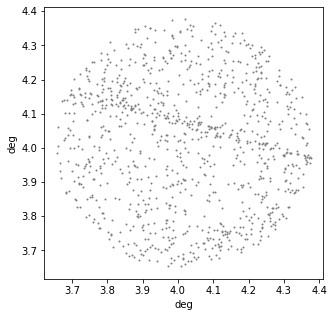

In [4]:
plt.figure(figsize=(5,5))
plt.scatter(pos[0], pos[1], s= pointsize, color='grey') #deg
plt.xlabel(unit)
plt.ylabel(unit)

This stream is a $10 {\rm M}_{\rm Pal 5}$-like stream injected at an angle of $\approx 73\deg$. 
The stream has 130 stars and the field has 879 stars.

## Run HSS

Make sure you have the following modules:
matplotlib, numpy, scipy, astropy and if including masks: regions (from astropy)

-------------------------------

Stream detected at an angle of:
theta_peak = [73.5][deg]

Stream detected at a minimum Euclidian distance of:
rho_peak = [0.79] deg

Stream detected at a significance of:
-(logPr(X>=k)) = [78.15]

-------------------------------

plots saved in /Users/spearson/Desktop/


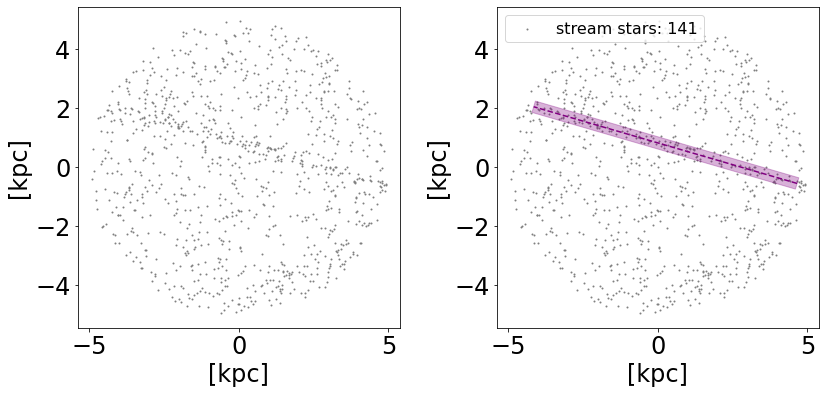

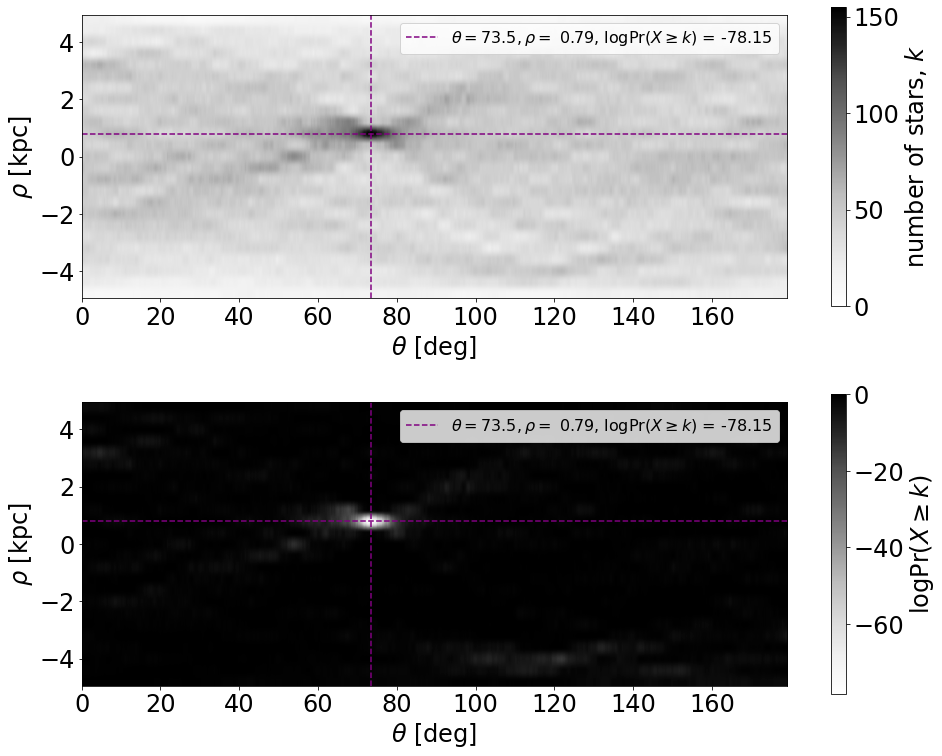

In [5]:
HSS.RT_plot(pos, unit, kpc_conversion, delta_t, drho, outlier, pointsize, mask, filename[:-4], path_plot, verbose, rho_edge)



## Summary

The HSS run above located the stream with 141 stars at $\theta = 73.5 \deg$, at $\rho = 0.79$ kpc with a significance of log$_{10}$Pr = $-78$. The reason we found 141 stars (and not the injected 130) is because some of the background stars fall within the pruple `stripe'.